In [1]:
import pandas as pd
import pyarrow.parquet as pq
import os
import airportsdata 
from geopy.distance import geodesic

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pycountry
import pycountry_convert as pc
import plotly.io as pio
import seaborn as sns


# 1. Data Preparation

In [10]:
path_flights = os.getcwd() + '/data/data_flight_economy_business.xlsx'
data_direct = pd.read_excel(path_flights,sheet_name='direct')
data_non_direct = pd.read_excel(path_flights,sheet_name='non_direct')

In [23]:
data_direct

,icao,total_delegates,country_code,origin_airport,destination_airport,distance_to_dubai,assumed_load_factor,aircraft_type_icao,total_fuel_burn,co2_kg,...,latitude,longitude,Split Econ/Busi,Equivalent economy seats per flight,Seats Economy,Seats Business,co2 per weighted seat,total_kg_co2,pp_kg_co2,pp_g_co2_km
0,OMAA,4409.0,AE,OMAA,OMDB,115.950398,0.529896,DH8D,466.979806,1475.189208,...,24.43300,54.65110,0.128205,57.362943,36,5,25.716763,3.172736e+05,71.960449,620.614079
1,SBGR,7598.0,BR,SBGR,OMDB,12218.280093,0.787394,B77W,117028.001705,369691.457386,...,-23.42620,-46.48000,0.098361,436.266018,385,42,847.399160,1.315651e+07,1731.575913,141.720103
2,ZBAA,3480.0,CN,ZBAA,OMDB,5856.254969,0.641342,B77L,52082.273957,164527.903430,...,40.07250,116.59800,0.180672,236.070853,195,43,696.942894,4.811404e+06,1382.587424,236.087300
3,WIII,1229.0,ID,WIII,OMDB,6543.695620,0.637657,B77W,52290.480217,165185.627004,...,-6.12556,106.65600,0.098361,353.302105,385,42,467.547814,9.508812e+05,773.703171,118.236424
4,RJTT,2631.0,JP,RJTT,OMDB,7949.365154,0.645028,B77L,72779.497786,229910.433506,...,35.55330,139.78100,0.180672,237.427582,195,43,968.339195,5.083146e+06,1932.020450,243.040848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DAAG,33.0,DZ,DAAG,OMDB,5076.841504,0.614838,A332,31490.563146,99478.688977,...,36.69100,3.21541,0.065972,212.414755,269,19,468.322875,2.279720e+04,690.824229,136.073625
84,LFMN,28.0,FR,LFMN,OMDB,4790.372978,0.698774,B77W,38234.231550,120781.937466,...,43.65840,7.21587,0.098361,387.164927,385,42,311.965080,1.584025e+04,565.723360,118.095890
85,LDZA,27.0,HR,LDZA,OMDB,4166.712100,0.699784,B38M,9776.092429,30882.675983,...,45.74290,16.06880,0.093023,154.235852,156,16,200.230203,9.695724e+03,359.100884,86.183272
86,HHAS,7.0,ER,HHAS,OMDB,2039.020269,0.606955,B738,6400.667852,20219.709743,...,15.29190,38.91070,0.103896,122.850801,138,16,164.587529,1.838155e+03,262.593633,128.784219


In [13]:
data_direct.columns#.iloc[:3]

Index(['icao', 'total_delegates', 'country_code', 'origin_airport',
       'destination_airport', 'distance_to_dubai', 'assumed_load_factor',
       'aircraft_type_icao', 'total_fuel_burn', 'co2_kg', 'nox_kg', 'hc_kg',
       'oc_kg', 'h2o_kg', 'so2_kg', 'sulphates_kg', 'latitude', 'longitude',
       'Split Econ/Busi', 'Equivalent economy seats per flight',
       'Seats Economy', 'Seats Business', 'co2 per weighted seat',
       'total_kg_co2', 'pp_kg_co2', 'pp_g_co2_km'],
      dtype='object')

# 2. Data Analysis
## 2.1 General

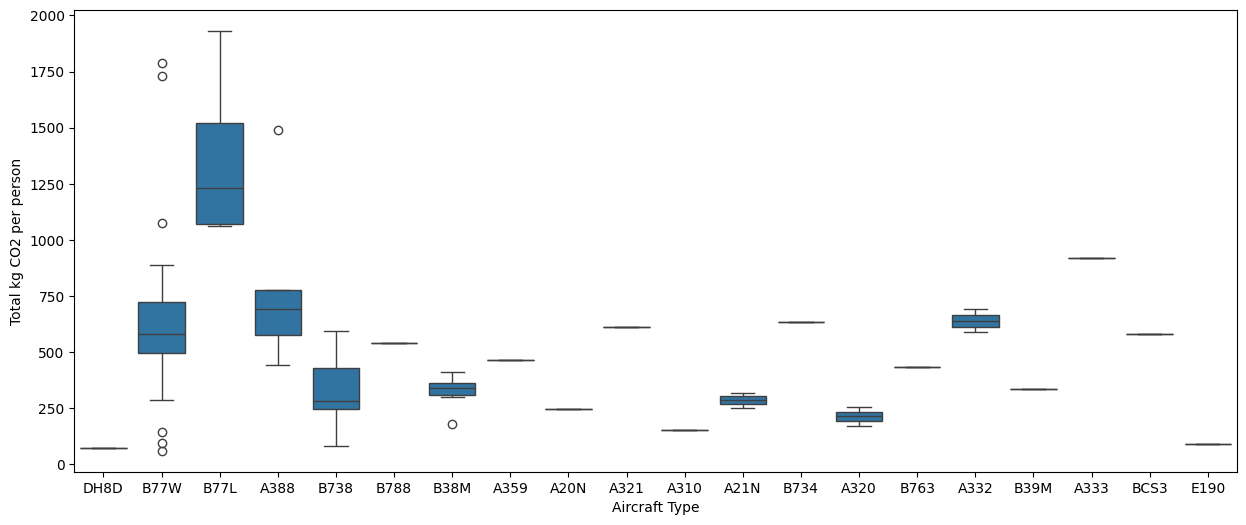

In [24]:
# Boxplot for total_fuel_burn
plt.figure(figsize=(15, 6))
sns.boxplot(x='aircraft_type_icao', y='pp_kg_co2', data=data_direct)
# plt.title('Total kg of CO2 per person')
plt.xlabel('Aircraft Type')
plt.ylabel('Total kg CO2 per person')
plt.show()

## 2.2 Split Economy/Business Class

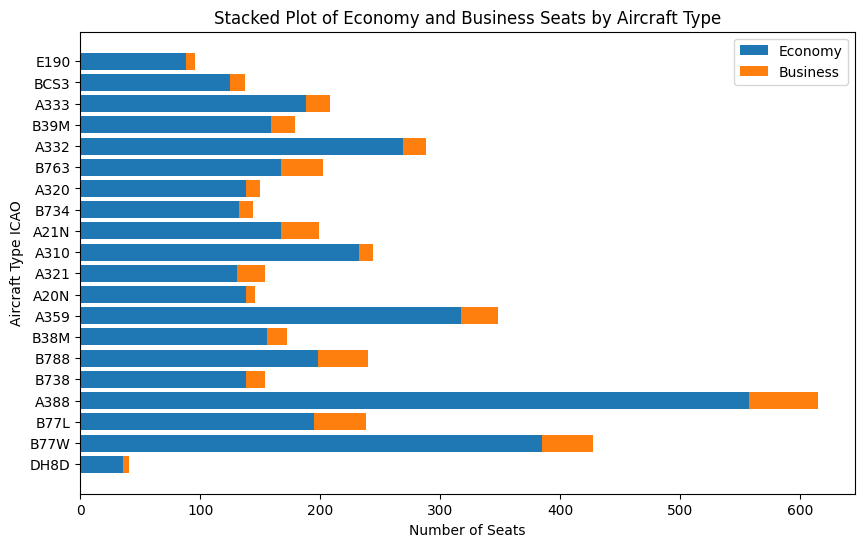

In [21]:

data_direct.dropna(subset=['Seats Economy', 'Seats Business'], inplace=True)

# Convert 'Seats Economy' and 'Seats Business' to integers
data_direct['Seats Economy'] = data_direct['Seats Economy'].astype(int)
data_direct['Seats Business'] = data_direct['Seats Business'].astype(int)

# Plot
plt.figure(figsize=(10, 6))

# Stacked bar plot
plt.barh(data_direct['aircraft_type_icao'], data_direct['Seats Economy'], label='Economy')
plt.barh(data_direct['aircraft_type_icao'], data_direct['Seats Business'], left=data_direct['Seats Economy'], label='Business')

# Labels and title
plt.xlabel('Number of Seats')
plt.ylabel('Aircraft Type ICAO')
plt.title('Stacked Plot of Economy and Business Seats by Aircraft Type')
plt.legend()

# Show plot
plt.show()
